In [1]:
# Import required Dependencies
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Error Metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

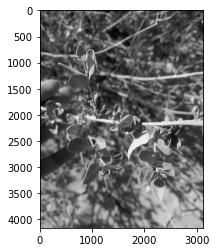

In [9]:
img = cv2.imread('botanic/Atriplex/IMG_20210114_112012.jpg',0)  # 0 For Gray scale
 # Your image needs to be in Gray Scale for Thresholding
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

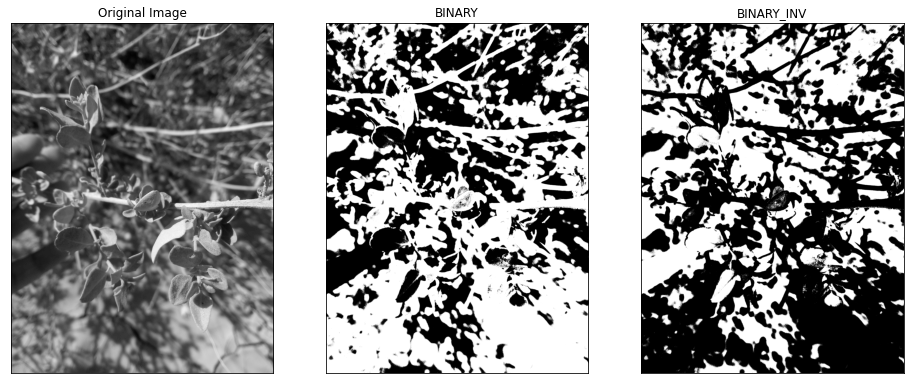

In [5]:
ret,thresh1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)  #  image ,  Threshold value , max, method 
ret,thresh2 = cv2.threshold(img,80,255,cv2.THRESH_BINARY_INV)


titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]
plt.figure(figsize=(16, 12))
for i in range(3):

    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray') # to visualize gray in matplotlib
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

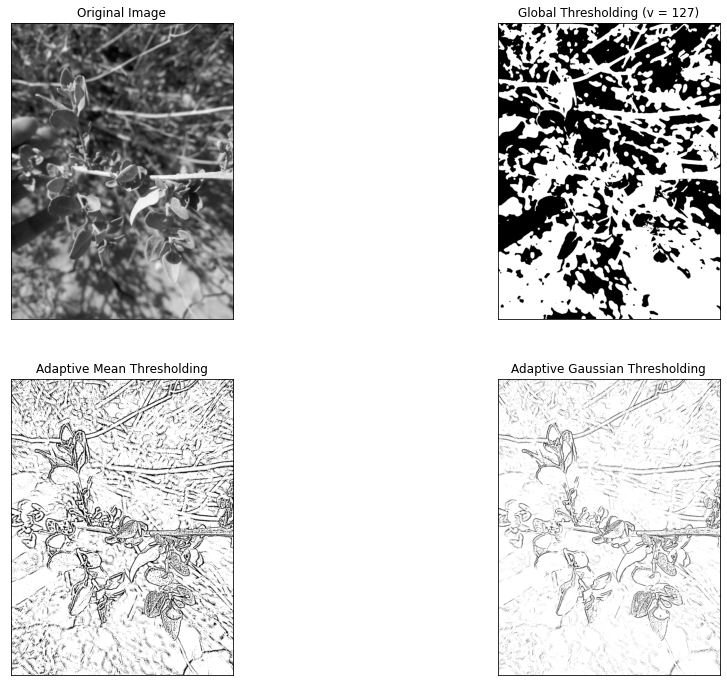

In [18]:
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2) # image  ,  # max  ,# method  , # Threshold type  , # Block Size , # Constant
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

plt.figure(figsize=(16, 12))
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

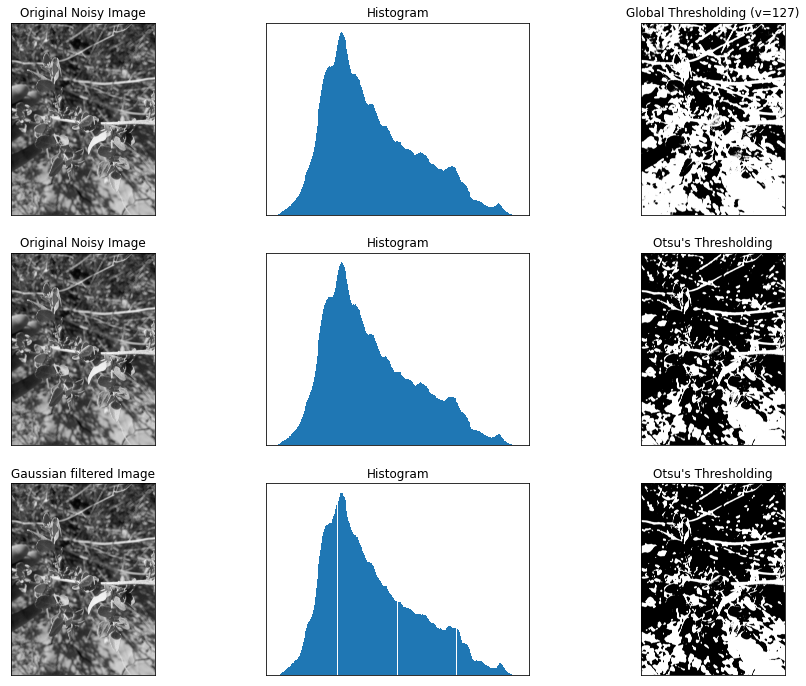

In [10]:
# global thresholding
ret1,th1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(16, 12))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

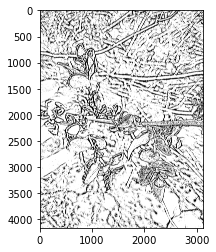

In [20]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening ,'gray')

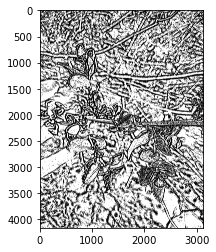

In [21]:
erosion = cv2.erode(th2,kernel,iterations = 1)  #  img , kernel , iterations
plt.imshow(erosion ,'gray')

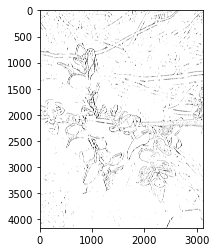

In [22]:
dilation = cv2.dilate(th2,kernel,iterations = 1)
plt.imshow(dilation ,'gray')

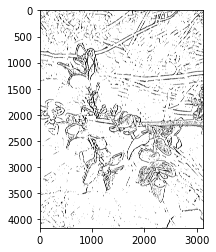

In [23]:
closing = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing ,'gray')

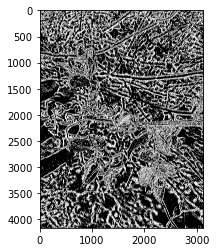

In [24]:
gradient = cv2.morphologyEx(th2, cv2.MORPH_GRADIENT, kernel)  # Dilation - Erosion
plt.imshow(gradient ,'gray')

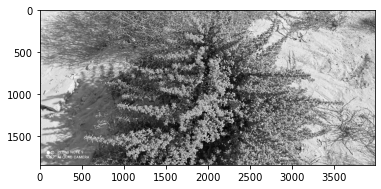

In [25]:
img = cv2.imread('botanic/Forskalii/IMG_20210114_111200.jpg',0)  # 0 For Gray scale
 # Your image needs to be in Gray Scale for Thresholding
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

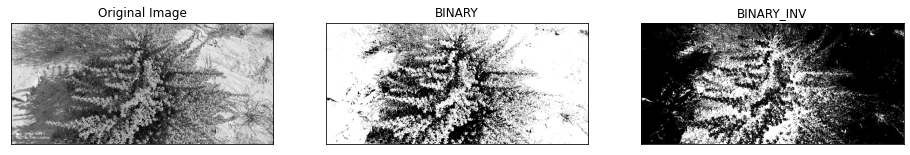

In [26]:
ret,thresh1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)  #  image ,  Threshold value , max, method 
ret,thresh2 = cv2.threshold(img,80,255,cv2.THRESH_BINARY_INV)


titles = ['Original Image','BINARY','BINARY_INV']
images = [img, thresh1, thresh2]
plt.figure(figsize=(16, 12))
for i in range(3):

    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray') # to visualize gray in matplotlib
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

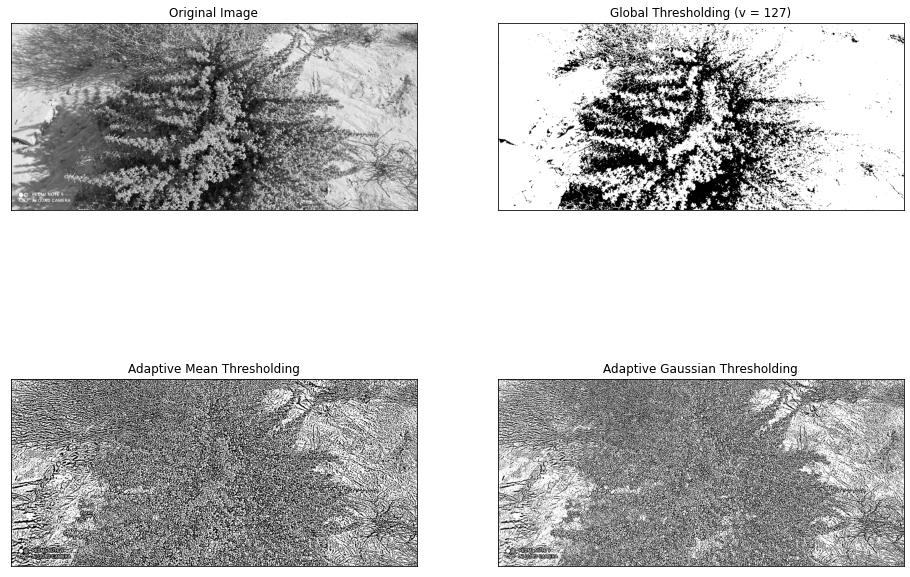

In [27]:
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2) # image  ,  # max  ,# method  , # Threshold type  , # Block Size , # Constant
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

plt.figure(figsize=(16, 12))
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

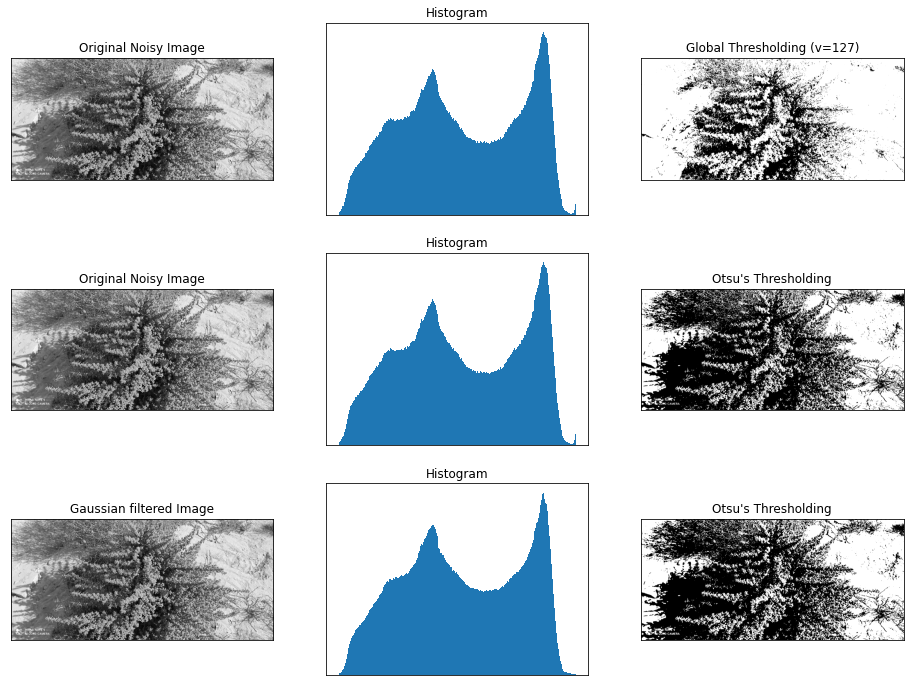

In [28]:
# global thresholding
ret1,th1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(16, 12))

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

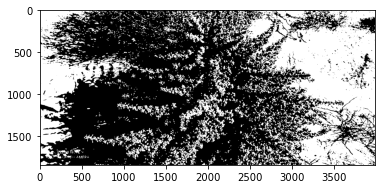

In [29]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening ,'gray')

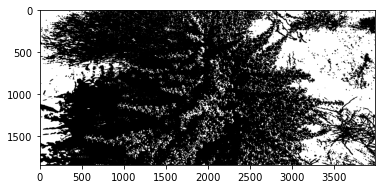

In [30]:
erosion = cv2.erode(th2,kernel,iterations = 1)  #  img , kernel , iterations
plt.imshow(erosion ,'gray')

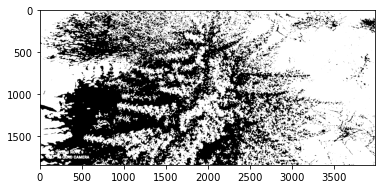

In [31]:
dilation = cv2.dilate(th2,kernel,iterations = 1)
plt.imshow(dilation ,'gray')

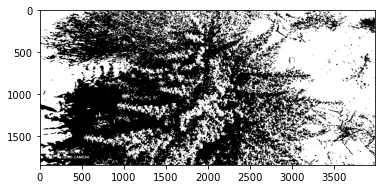

In [32]:
closing = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing ,'gray')

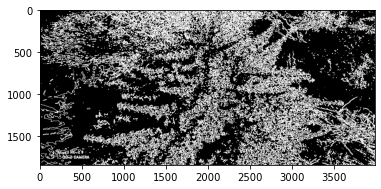

In [38]:
gradient = cv2.morphologyEx(th2, cv2.MORPH_GRADIENT, kernel)  # Dilation - Erosion
plt.imshow(gradient ,'gray')

In [40]:
# Create Dataframe for train data
colNames = []
colNames.append('label')
for i in range(40000):
    pixel = 'pixel'+str(i)
    colNames.append(pixel)
df_all = pd.DataFrame(columns = colNames)

In [41]:
# Convert Images to array in Datarame
all = 0
folder = 'botanic'
# Open each folder of images
for subfolder in os.listdir(folder):
    i = 0
    for filename in os.listdir(os.path.join(folder,subfolder)):
        # read the images, resize (200*200), convert to grey scale, then to 2D array
        img = cv2.imread(os.path.join(folder,subfolder,filename), 0)
        img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
        kernel = np.ones((5,5),np.uint8)
        img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        img=cv2.resize(img,(200,200))
        #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_ar = np.asarray(img, dtype="int32")
        data = []
        
        # All (400) images (2D array) add to all dataframe, starting with label (image folder name)
        data.append(subfolder)
        for y in range(200):
            for x in range(200):
                data.append(img_ar[x][y])
        df_all.loc[all] = data
        all += 1

        i += 1

In [42]:
# Save Dataframes to CSV files
df_all.to_csv("all.csv", index=False)

In [43]:
# Load train and test csv files in dataframes
df = pd.read_csv("all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Columns: 40001 entries, label to pixel39999
dtypes: int64(40000), object(1)
memory usage: 1.3+ GB


In [44]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  Atriplex     255     255     255     255     255     255     255     255   
1  Atriplex     255     255     128     255     255     255     255     255   
2  Atriplex     255     255     255     255     255     255     255     255   
3  Atriplex     255     255     255     255     255     255      54     255   
4  Atriplex     255     255     255     255     255     255     255     255   

   pixel8  ...  pixel39990  pixel39991  pixel39992  pixel39993  pixel39994  \
0     255  ...         255         255         255         255         255   
1     255  ...         255         255         255         255         255   
2     255  ...         255         255         255         255         255   
3     255  ...         255         255         255         255         255   
4     255  ...         255         255         255         255         255   

   pixel39995  pixel39996  pixel39997  pixel39998  pixel39999  
0         255         255         255         255         255  
1         255         255         255         255         255  
2         255         255         255         255         255  
3         255         255         255         255         255  
4         255         255         255         255         255  

[5 rows x 40001 columns]

In [45]:
examp = df.iloc[1, 1:]
examp.shape

(40000,)

In [46]:
print(examp)

pixel0        255
pixel1        255
pixel2        128
pixel3        255
pixel4        255
             ... 
pixel39995    255
pixel39996    255
pixel39997    255
pixel39998    255
pixel39999    255
Name: 1, Length: 40000, dtype: object


In [47]:
examp = df.iloc[2, 1:]
examp.shape

(40000,)

In [48]:
df.label.value_counts()

Atriplex                 400
Calotropis procera       400
Capparis                 400
Deplotaxis harra         400
Forskalii                400
Heliotropium             400
Lycium shawii            400
Ocradinus                400
Pharsetia aegyptia       400
Zilla spinosa            400
Zygophyllum coccinium    400
Name: label, dtype: int64

In [49]:
df.isnull().sum()

label         0
pixel0        0
pixel1        0
pixel2        0
pixel3        0
             ..
pixel39995    0
pixel39996    0
pixel39997    0
pixel39998    0
pixel39999    0
Length: 40001, dtype: int64

In [50]:
# average values/distributions of features
description = df.describe()
description

pixel0       pixel1       pixel2       pixel3       pixel4  \
count  4400.000000  4400.000000  4400.000000  4400.000000  4400.000000   
mean    220.691818   222.042955   218.771364   218.946591   215.668864   
std      83.528867    81.241376    85.089600    84.077042    88.291846   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     255.000000   255.000000   255.000000   255.000000   255.000000   
50%     255.000000   255.000000   255.000000   255.000000   255.000000   
75%     255.000000   255.000000   255.000000   255.000000   255.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

            pixel5       pixel6       pixel7       pixel8       pixel9  ...  \
count  4400.000000  4400.000000  4400.000000  4400.000000  4400.000000  ...   
mean    217.715227   216.430455   218.129091   216.440455   217.127045  ...   
std      86.017619    86.700626    85.894550    87.563125    86.408641  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     255.000000   255.000000   255.000000   255.000000   255.000000  ...   
50%     255.000000   255.000000   255.000000   255.000000   255.000000  ...   
75%     255.000000   255.000000   255.000000   255.000000   255.000000  ...   
max     255.000000   255.000000   255.000000   255.000000   255.000000  ...   

        pixel39990   pixel39991   pixel39992   pixel39993   pixel39994  \
count  4400.000000  4400.000000  4400.000000  4400.000000  4400.000000   
mean    216.148409   217.653636   215.560455   216.170227   218.775227   
std      87.461547    86.557756    87.904539    87.650696    85.281008   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     255.000000   255.000000   255.000000   255.000000   255.000000   
50%     255.000000   255.000000   255.000000   255.000000   255.000000   
75%     255.000000   255.000000   255.000000   255.000000   255.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

        pixel39995   pixel39996   pixel39997   pixel39998   pixel39999  
count  4400.000000  4400.000000  4400.000000  4400.000000  4400.000000  
mean    216.323864   218.290000   218.090909   219.639773   220.069318  
std      87.662631    85.479222    86.139160    84.001237    83.698191  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%     255.000000   255.000000   255.000000   255.000000   255.000000  
50%     255.000000   255.000000   255.000000   255.000000   255.000000  
75%     255.000000   255.000000   255.000000   255.000000   255.000000  
max     255.000000   255.000000   255.000000   255.000000   255.000000  

[8 rows x 40000 columns]

# Data Preparation for Model Building

In [46]:
# Creating training and test sets
# Splitting the data into train and test
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3520, 40000)
(880, 40000)
(3520,)
(880,)


# Model Building
## Linear SVM

In [47]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [48]:
# predict
predictions = svm_linear.predict(x_test)
predictions[:10]

array(['Deplotaxis harra', 'Deplotaxis harra', 'Zygophyllum coccinium',
       'Heliotropium', 'Zygophyllum coccinium', 'Atriplex',
       'Deplotaxis harra', 'Zilla spinosa', 'Pharsetia aegyptia',
       'Forskalii'], dtype=object)

In [49]:
# evaluation: Confusion Matrix
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[58,  4,  0,  2,  2,  2,  2,  4,  0,  2,  5],
       [ 3, 23,  3,  7,  0,  4, 12,  7,  5,  1,  8],
       [ 3,  7,  6, 12,  3,  3, 11,  4,  1,  6, 24],
       [ 2, 13,  3, 40,  0,  0,  9,  1,  0,  6,  2],
       [ 6,  5,  1,  6, 58,  3,  3,  2,  0,  5,  3],
       [ 5, 10,  4,  8,  1, 42,  8,  2,  1,  2,  8],
       [ 7,  6,  2, 19,  3,  3, 19,  5,  4,  3,  9],
       [ 2, 12,  1, 10,  0,  2,  6, 40,  0,  3,  9],
       [ 0,  3,  0,  6,  1,  1,  2,  0, 60,  4,  2],
       [ 1, 12,  6,  7,  2,  3, 10,  9,  1,  3,  5],
       [ 5,  2,  3,  6,  1,  3,  5,  0,  1,  1, 57]], dtype=int64)

In [50]:
plants = df.label.unique()
plants

array(['Atriplex', 'Calotropis procera', 'Capparis', 'Deplotaxis harra',
       'Forskalii', 'Heliotropium', 'Lycium shawii', 'Ocradinus',
       'Pharsetia aegyptia', 'Zilla spinosa', 'Zygophyllum coccinium'],
      dtype=object)

<AxesSubplot:>

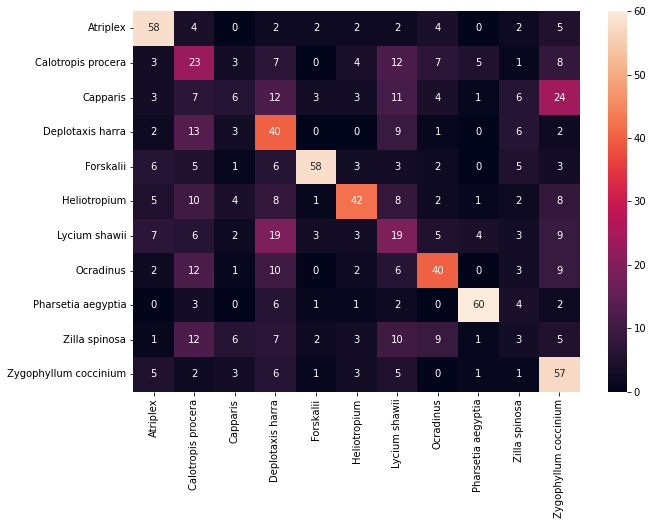

In [51]:
df_cm = pd.DataFrame(confusion, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt='d')

In [52]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.46136363636363636

## Testing all the classifiers

In [53]:
import warnings
warnings.filterwarnings("ignore")